# Laboratorium 5 - Aproksymacja

In [16]:
import pandas as pd
import numpy as np
from io import StringIO
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as integrate

sns.set_style("darkgrid")

In [17]:
x_vec = np.array(
    [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980], dtype=np.double
)
y_vec = np.array(
    [
        76_212_168,
        92_228_496,
        106_021_537,
        123_202_624,
        132_164_569,
        151_325_798,
        179_323_175,
        203_302_031,
        226_542_199,
    ],
    dtype=np.double,
)

### Zadanie 1. 
Wykonaliśmy aproksymację średniokwadratową punktową populacji
Stanów Zjednoczonych w przedziale $[1900,1980]$ wielomianami stopnia $m$ dla
$0 ≤m ≤6$. W tabeli poniżej przedstawione są wartości będące przedmiotem aproksymacji. Na podstawie tych wartości wyznaczymy wielomian aproksymacyjny stopnia $m$ dla $m = 1,...,6$. Następnie dla każdej wartości $m$ dokonamy ekstrapolacji do roku 1990 i wyznaczymy minimalny błąd względny.

In [18]:
data = """
Rok,Populacja
1900,76_212_168
1910,92_228_496
1920,106_021_537
1930,123_202_624
1940,132_164_569
1950,151_325_798
1960,179_323_175
1970,203_302_031
1980,226_542_199
"""

df = pd.read_csv(StringIO(data))

display(df)

,Rok,Populacja
0,1900,76_212_168
1,1910,92_228_496
2,1920,106_021_537
3,1930,123_202_624
4,1940,132_164_569
5,1950,151_325_798
6,1960,179_323_175
7,1970,203_302_031
8,1980,226_542_199


In [19]:
steps = range(7)
results = {}

Na początku wyliczamy macierz Vandermonde'a dla wszystkich stopni m i następnie przy jej użyciu wyznaczamy współczynniki przy wielomianach.

In [20]:
def vandermonde_matrix(x, m):
    return np.vander(x, m + 1, increasing=True)


def solve_factorials(A, y):
    return np.linalg.solve(A.T @ A, A.T @ y)


In [21]:
for m in steps:
    A = vandermonde_matrix(x_vec, m)
    b = solve_factorials(A, y_vec)
    results[m] = b

In [22]:
def evaluate_polynomial(x, b):
    result = 0
    for i, coef in enumerate(b):
        result += coef * (x**i)
    return result

#### Zadanie 1 (a)

Z obliczeń prognoz wynika, że najmniejszy błąd względny osiągamy dla wielomianu 6. stopnia. Podobnym błędem obarczona jest też ekstrapolacja wielomianem 2. lub 4. stopnia.

In [23]:
for m, b in results.items():
    x = 1990
    y = evaluate_polynomial(x, b)
    print(f"Prognoza populacji w {x} roku: {y:.0f}, dla m={m}")
    print(f"względny błąd prognozy: {abs(y - 248_709_873) / 248_709_873:.2%}")

Prognoza populacji w 1990 roku: 143369177, dla m=0
względny błąd prognozy: 42.35%
Prognoza populacji w 1990 roku: 235808109, dla m=1
względny błąd prognozy: 5.19%
Prognoza populacji w 1990 roku: 254712945, dla m=2
względny błąd prognozy: 2.41%
Prognoza populacji w 1990 roku: 261439719, dla m=3
względny błąd prognozy: 5.12%
Prognoza populacji w 1990 roku: 256411956, dla m=4
względny błąd prognozy: 3.10%
Prognoza populacji w 1990 roku: 226938061, dla m=5
względny błąd prognozy: 8.75%
Prognoza populacji w 1990 roku: 243501315, dla m=6
względny błąd prognozy: 2.09%


In [24]:
def calculate_mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [25]:
def AIC(m, y_vec, y_pred):
    n = len(y_vec)
    return 2 * (m + 1) + n * np.log(np.sum((y_vec - y_pred) ** 2) / n)


def AICc(AIC, m, n):
    return AIC + 2 * (m + 1) * (m + 2) / (n - m - 2)

### Zadanie 1 (b)

Aby wyznaczyć optymalny stopień wielomianu zastosujemy kryterium informacyjne Akaikego `AIC` $$ \text{AIC} = 2k + n \ln\left(\frac{\sum_{i=1}^{n} [y_i - \hat{y}(x_i)]^2}{n}\right),$$. Ponieważ rozmiar próbki jest niewielki, zastosujemy wzór ze składnikiem korygującym `AICc` $$ \text{AIC}_c = \text{AIC} + \frac{2k(k+1)}{n - k - 1}. $$

In [26]:
for m, b in results.items():
    y_pred = evaluate_polynomial(x_vec, b)
    mse = calculate_mean_squared_error(y_vec, y_pred)
    aic = AIC(m, y_vec, y_pred)
    aicc = AICc(aic, m, len(y_vec))
    print(f"AIC dla m={m}: {aic:.2f}, AICc: {aicc:.2f}")

AIC dla m=0: 320.44, AICc: 321.01
AIC dla m=1: 287.06, AICc: 289.06
AIC dla m=2: 274.65, AICc: 279.45
AIC dla m=3: 274.88, AICc: 284.88
AIC dla m=4: 274.54, AICc: 294.54
AIC dla m=5: 277.71, AICc: 319.71
AIC dla m=6: 274.87, AICc: 386.87


### Zadanie 2

Wykonujemy aproksymację średniokwadratową ciągłą funkcji $f(x) = \sqrt{x} $ w przedziale $[0,2]$ wielomianem drugiego stopnia, używając wielomianów
Czebyszewa. Aproksymacja ta jest tańszym obliczeniowo zamiennikiem aproksymacji jednostajnej.

In [27]:
def f(x):
    return np.sqrt(x)


a = 0
b = 2


def chebyshev_t0(t):
    return 1


def chebyshev_t1(t):
    return t


def chebyshev_t2(t):
    return 2 * t**2 - 1


chebyshev_polynomials = [chebyshev_t0, chebyshev_t1, chebyshev_t2]


def chebyshev_weight(t):
    return 1 / np.sqrt(1 - t**2)

In [28]:
coefficients = [
    integrate.quad(
        lambda x: chebyshev_weight(x - 1) * f(x) * chebyshev_polynomials[k](x - 1),
        0,
        2,
    )[0]
    / (np.pi if k == 0 else np.pi / 2)
    for k in range(3)
]


def polynomial(x):
    return sum(coefficients[k] * chebyshev_polynomials[k](x - 1) for k in range(3))

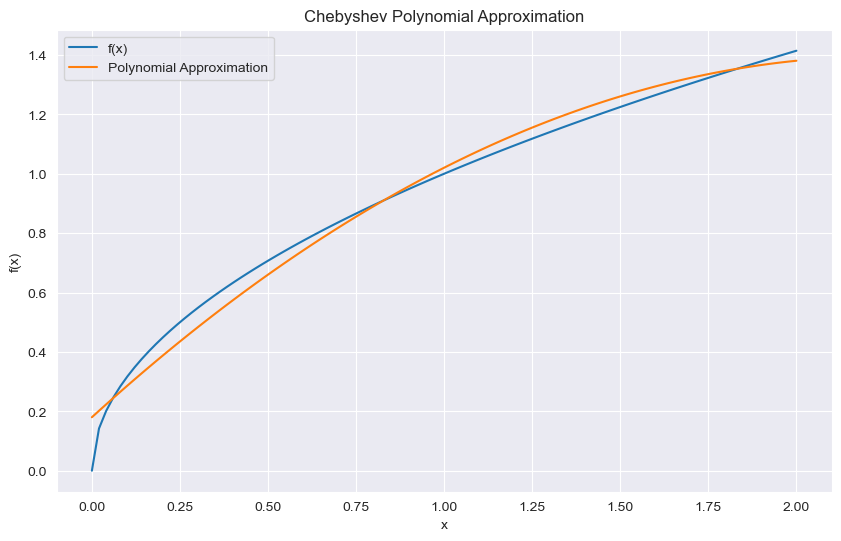

In [29]:
plt.figure(figsize=(10, 6))
x = np.linspace(0, 2, 100)
plt.plot(x, f(x))
plt.plot(x, polynomial(x))
plt.title("Chebyshev Polynomial Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["f(x)", "Polynomial Approximation"])
plt.show()


Wykres pozwala ocenić, że wielomian aproksymacyjny dobrze przybliża funkcję $f$. Obliczymy też błąd względny aproksymacji następującą metodą:
 - Obliczymy całkę $\int_{0}^{2} |p(x) - \sqrt{x}|dx$, gdzie $p(x)$ to nasz wielomian aproksymacyjny
 - Wynik podzielimy przez całkę z $g(x) = x$ na podanym przedziale - jest ona równa 2.

In [30]:
f = lambda x: np.abs(polynomial(x) - np.sqrt(x))
y = f(x)
integral = np.trapezoid(y, x)
print(f"Błąd względny wynosi: {integral / 2:.2%}")

Błąd względny wynosi: 3.17%


### Wnioski

- Najmniejszy błąd względny odnotowano dla wielomianu 6. stopnia, co jest niezgodne z wynikami kryterium informacyjnego Akaikego ze składnikiem korygującym. Wskazał on jako najdokładniejszy wielomian 2. stopnia, który też ma niewielki błąd względny, porównywalny z błędem wielomianu 6. stopnia. Nieścisłość w wyznaczeniu najdokładniejszego wielomianu wynika z niewielkiej ilości parametrów.
- Aproksymacja ciągła wielomianami Czebyszewa pozwala uzyskać wielomian o wartościach bardzo zbliżonych do funkcji wyjściowej, z sumarycznym błędem względnym w przybliżeniu równym 3%.